In [2]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import style

style.use('dark_background')

### Сгенерируем выборку объемом 1000 из арксинусного распределения, нарисуем ее гистограмму и плотность функции распределения.

Text(0, 0.5, 'f(x)  /  Fraction of samples')

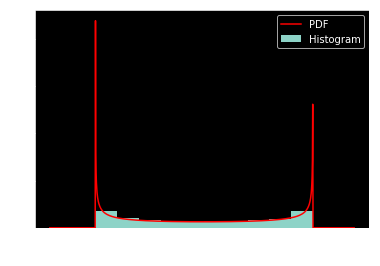

In [12]:
#Задаем распределение, сразу запишем ее матожидание и дисперсию для использования соотв. переменных в дальнейшем
rv = sts.arcsine(0.05,5) #Это функция распределения
mean = rv.mean() #Это ее матожидание
var = rv.var() #А это - дисперсия
#Генерируем выборку
sample = rv.rvs(1000)
#Рисуем график
x = np.linspace(-1,6,1000)
pdf = rv.pdf(x)
plt.hist(sample, normed=True, label="Histogram")
plt.plot(x, pdf, label = "PDF", color = "Red")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)  /  Fraction of samples")

## Посчитаем выборочное среднее по 1000 раз для n = 2, 10 и 50 и нарисуем графики

#### Зададим функцию:

In [4]:
def week4(n): 
    hist = [sum(rv.rvs(n))/n for i in range(1000)] #создаем список из 1000 выборочных средних из выборок случайной величины объемом n.
    norm_mean = mean # Согласно ЦПТ, атожидание нормального распределения выборочных средних равно матожиданию случайной величины
    norm_var = var / n # Согласно ЦПТ, дисперсия нормального распредления выборочных средних равна дисперсии случайной величины деленной на n
    norm_sigma = np.sqrt(norm_var) # Cреднеквадратичное отклонение нормального распределения равно квадратному корню дисперсии.
    norm_rv = sts.norm(loc=norm_mean, scale=norm_sigma) #Задаем нормальное распределение с параметрами, вычисленными выше, согласно ЦПТ.
    norm_pdf = norm_rv.pdf(x) #Определяем функции плотности вероятности распределения.
    #Рисуем графики
    plot_label_hist = "Histogram n=" + str(n)
    plot_label_pdf = "PDF n=" + str(n)
    plt.hist(hist, normed=True, label=plot_label_hist) # Рисуем гистограмму
    plt.plot(x, norm_pdf, label=plot_label_pdf, color = "Red") #Рисуем график функции плотности вероятности
    plt.xlabel("x")
    plt.ylabel("f(x)  /  Fraction of samples")
    plt.legend()

# Для n = 1:

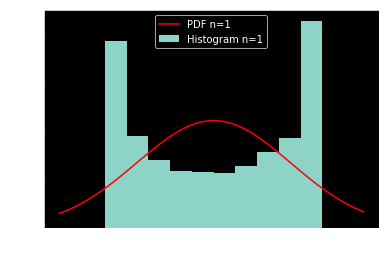

In [13]:
week4(1)

## Для n = 2:

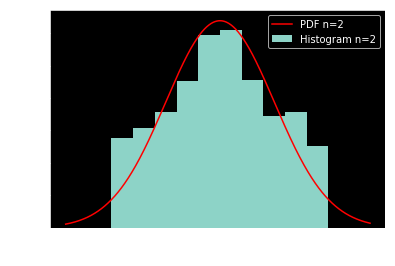

In [14]:
week4(2)

#### Для n = 10:

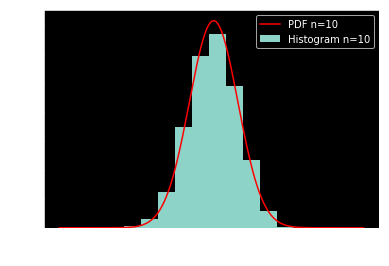

In [15]:
week4(10)

## Для n = 20:

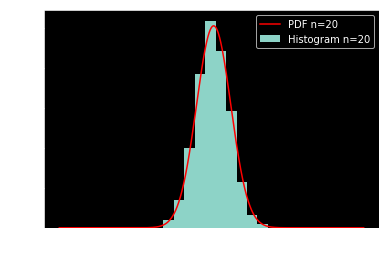

In [16]:
week4(20)

#### Для n = 30:

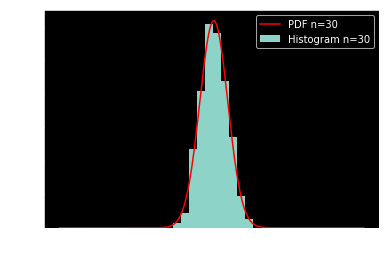

In [17]:
week4(30)

#### Для n = 40:

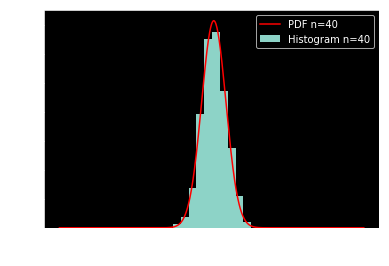

In [18]:
week4(40)

#### Для n = 50:

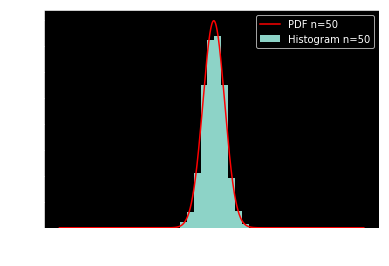

In [19]:
week4(50)

### Вывод:

C увеличением n гистограмма выборочных средних сужается, график функции плотности вероятности их нормального распределения также сужается. Это происходит потому что с увеличением размера выборки их средние значения стремятся к матожиданию функции распределения, следовательно дисперсия нормального распределения уменьшается с увеличением n (это также очевидно из математического представления ЦПТ). Точность нормальной аппроксимации увеличивается с ростом n. Уже при n = 2 гистограмма выборочных средних перестает быть бимодальной.